# CQF Exam 3

## January 2024 Cohort

## Task 1

What is the cost function of Logistic Regression? Explain in Detail.

### Answer:
This follows mostly [1] (p. 7-10, 25-26) and [2].

Logistic regression is one of the most used machine learning methods for classification mapping qualitative data onto categorical variables, e.g. either 0 or 1. The cost function derived for logistic regression is the so-called Binary Cross Entropy cost function and can be derived as follows:

***1. Logistic probability predictor via logit function***

To model the probability $p$ of the classification mapping to 1, we can invert the logit function that converts log-odds to probabilities $$logit(p) = \log\left(\frac{p}{1 - p}\right)=z,$$ solving for $$p=\frac{1}{1 + e^{-z}}=:\sigma(z).$$ This so-called sigmoid function can be used to model probabilities as it yields values between 0 and 1, as can seen per plot below:

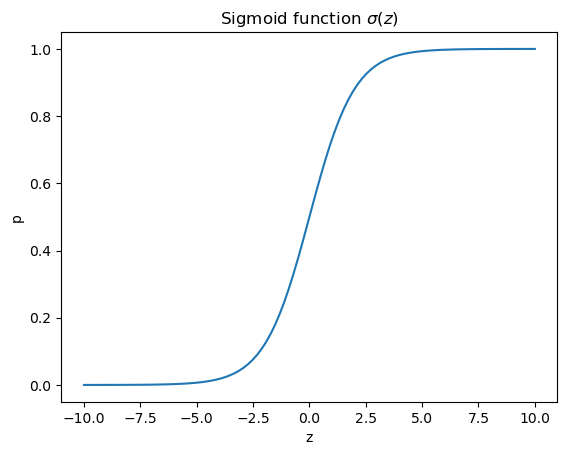

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
p = sigmoid(z)

plt.figure()
plt.plot(z, p)
plt.title('Sigmoid function $\sigma(z)$')
plt.xlabel('z')
plt.ylabel('p')
plt.show()

Now, the predictor function for a training data point $(x,y)$ is given by the sigmoid function applied to the linear combination of input features:
$$\hat{y}=P(Y=1|X=x) = \sigma(\mathbf{w}\cdot\mathbf{x}).$$

***2. Probability of the output $y$***

For a given input $x$ and its corresponding label $y$:
$$P(Y=y|X=x)=
\begin{cases}
\hat{y} = \sigma(\mathbf{w}\cdot\mathbf{x}) & \text{if } y=1\\
1-\hat{y} = 1-\sigma(\mathbf{w}\cdot\mathbf{x}) & \text{if } y=0.
\end{cases}$$

***3. Bernoulli distribution***

If $y$ can either take values 0 or 1, then $Y \sim \text{Ber}(p)$ follows a Bernoulli distribution with $p = \sigma(\mathbf{w} \cdot \mathbf{x})$. Hence:
\begin{align*}
P(Y=y|X=x) &=p^y \cdot (1-p)^{(1-y)}\\
&=\sigma(\mathbf{w}\cdot\mathbf{x})^y \cdot \left(1-\sigma(\mathbf{w}\cdot\mathbf{x})\right)^{(1-y)}\\
&=\hat{y}^y \cdot \left(1-\hat{y}\right)^{(1-y)}
\end{align*}

***4. Log-likelihood***

Taking the natural logarithm of the probability of the above and applying logarithm laws yields
$$\log P(Y=y|X=x) = y\log(\hat{y}) + (1-y)\log(1-\hat{y}).$$

***5. Cost function for one training data point $(x,y)$***

To convert this problem into a minimization problem, we consider the negative of the log-likelihood. For a single training example $(x,y)$, we obtain the cost function:
$$L(\hat{y}, y) = -\log P(y|x) = -\left(y\log(\hat{y}) + (1-y)\log(1-\hat{y})\right)$$

***6. Cost function for the entire dataset***

To get the cost function for the entire training dataset, we sum over all training examples and take the average. If we have $n$ training examples, the cost function called the *Binary Cross Entropy function* is then obtained as
\begin{align*}
J(\mathbf{w}) &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})\right)\\
 &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\sigma(\mathbf{w}\cdot x^{(i)})) + (1-y^{(i)})\log(1-\sigma(\mathbf{w}\cdot x^{(i)}))\right)\\
 &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\right)
\end{align*}

This cost function is minimized to train the logistic regression model, leading to optimal parameters $\mathbf{w}$ that best fit the training data. Since the function is convex, we can use gradient descent to find the global minimum.

## Task 2

What are voting classifers in ensemble learning?

### Answer:
This follows mostly [3] and [4].

Ensemble models are machine learning models that combine multiple individual predictors to arrive at a prediction. A group of predictors forms an ensemble. The idea is that the collective of multiple models often produces better results than a single model in both efficiency and accuracy. To combine the various classifiers into a final predictor, there are different voting classifiers, such as:

**1. Arithmetic averaging**: Each individual model makes a prediction. The final prediction determined by taking the arithmetic average over all individual predictions. This voting style is used in Bagging algorithms like Random Forests which use Decision Trees and can help to reduce variance (help with overfitting).

As a prominent example, the final estimator to a regression problem employing Random Forests sampled into $M$ data sets from the original data set $\mathcal{D}: \mathcal{D}_1,...,\mathcal{D}_M$ trained to maximum depth $f(x,\mathcal{D}_i)$ is given by
$$\hat{f}(x) = \frac{1}{M}\sum_{i=1}^{M}f(x;\mathcal{D}_i).$$

**2. Weighted vote classifiers**: This approach is often used in Boosting algorithms with base models that are weak learning algorithms, i.e. only *slightly* better than chance (e.g. decision tree with low depth and high bias). Boosting algorithms are addititive models which are sequentially trained on smaller structures. Each model aims to correct the errors of its predecessor by adjusting weights used in the weighted average, while the metric to measure (and therefore correct) the error of the predecessor model may vary depending on loss function. Such Boosting algorithms like AdaBoost or Gradient Boosting can help to reduce bias.

As a prominent example, the final estimator to a classification problem with $(x_i,y_i)\in(X,\pm 1)$ of AdaBoost sampled over $M$ weak learners $G_m(x_i)$ is given by the weighted sum
$$\hat{G}(x) = \text{sign}\left(\sum_{m=1}^{M} \alpha_m G_m(x)\right).$$
The weights $\alpha_m = \ln\left(\frac{1 - e_m}{e_m}\right)$ will focus more on weak learners with high errors $$e_m = \frac{\sum_{i=1}^{N} w_i \mathbb{1}_{y_i\neq G(x_i)}}{\sum_{i=1}^{N} w_i}$$
in an attempt to improve the weakest weak learners. The data points $(x_i,y_i)$ are then re-weighted to finally obtain the final ensemble prediction.

**3. Hard voting**: This is a majority voting classifier where the final predictor will be determined by choosing the prediction with the most votes among the individual models. It is often used in classification algorithms, according to Dr. Panos Parpas' lecture, this is e.g. used in Bagging algorithms tailored for classification rather than regression problems. In this method, each model casts a vote for a class, and the class with the most votes is chosen as the final prediction.

**4. Soft Voting**: Unlike hard voting which counts the votes of each classifier in the ensemble and selects the class with the most votes, soft voting calculates the average predicted probabilities of each class for all classifiers and selects the class with the highest average probability. This can provide a more accurate prediction because soft voting also considers the confidence of each model.

## Task 3: Short-term asset return prediction

Follow the 7-steps to model building for your selected ticker,

* (a) produce a model to predict positive moves (up trend) using Support Vector Machine (SVM) model.
* (b) tune hyperparameters for the estimator and present the best model.
* (c) investigate the prediction quality using area under ROC curve, confusion matrix and classification report.

### Answer:
The 7 steps to model building are explained in [5] as follows:

1. Understand the problem
2. Collect data
3. Explore data (visualization)
4. Clean data (pre-process)
5. Transform data (normalization)
6. Select the appropriate model + train
7. Validate the model

We shall now implement these on the asset price of Tesla (ticker: TSLA) following mostly the approach from Python Labs [2] with some adjustments.

We will perform all 7 steps of the model building theory 

In [99]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.metrics import (accuracy_score, classification_report,
                             log_loss, ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

### ---------- Data Collection + Initial Data Analysis / Visualizations ----------

In [3]:
ticker = "TSLA"  # specify ticker

In [4]:
df = yf.download(ticker, start="2018-01-01")
df['Return'] = df['Close'].pct_change()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,NaN
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,-0.010233
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,-0.008290
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,0.006230
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,0.062638


In [5]:
# Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1611 entries, 2018-01-02 to 2024-05-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1611 non-null   float64
 1   High       1611 non-null   float64
 2   Low        1611 non-null   float64
 3   Close      1611 non-null   float64
 4   Adj Close  1611 non-null   float64
 5   Volume     1611 non-null   int64  
 6   Return     1610 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 100.7 KB


In [97]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,O-C,H-L,Sign,...,SMA_1,SMA_3,SMA_5,SMA_10,SMA_21,EMA_1,EMA_3,EMA_5,EMA_10,EMA_21
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-02,23.229334,23.463333,22.700666,22.916668,22.916668,55572000,-0.015748,0.312666,0.762667,-1.0,...,22.916668,23.273556,23.235467,23.155933,22.747524,22.916668,23.115321,23.142489,23.071941,22.733514
2018-02-05,22.531334,22.964666,22.200001,22.208668,22.208668,66961500,-0.030895,0.322666,0.764666,-1.0,...,22.208668,22.802890,23.016800,23.033067,22.806286,22.208668,22.661994,22.831215,22.914982,22.685801
2018-02-06,21.680668,22.414667,21.566668,22.264668,22.264668,76326000,0.002522,-0.584000,0.848000,1.0,...,22.264668,22.463334,22.858801,22.907600,22.861492,22.264668,22.463331,22.642366,22.796743,22.647516
2018-02-07,22.599333,23.066668,22.377333,23.000000,23.000000,104538000,0.033027,-0.400667,0.689335,1.0,...,23.000000,22.491112,22.734667,22.901667,22.888762,23.000000,22.731665,22.761577,22.833699,22.679560
2018-02-08,22.887333,23.241333,20.973333,21.015333,21.015333,154719000,-0.086290,1.872000,2.268000,-1.0,...,21.015333,22.093334,22.281067,22.752267,22.830159,21.015333,21.873499,22.179496,22.503087,22.528267


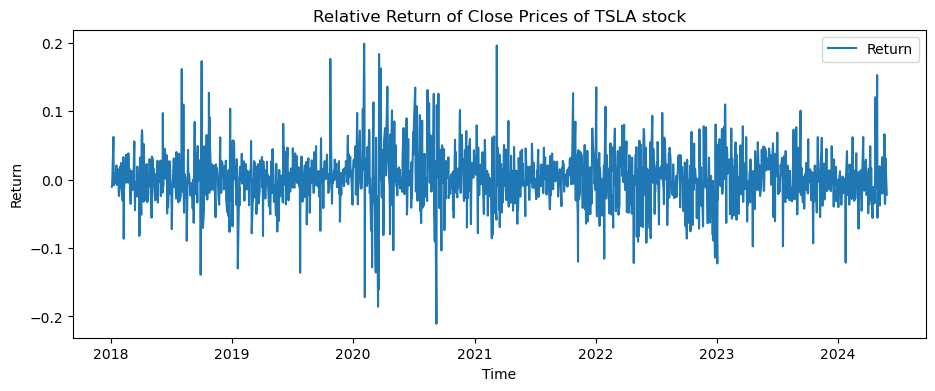

In [7]:
# Visualize the return data
plt.figure(figsize=(11, 4))
plt.plot(df['Return'], label='Return')
plt.title(f'Relative Return of Close Prices of {ticker} stock')
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend()
plt.show()

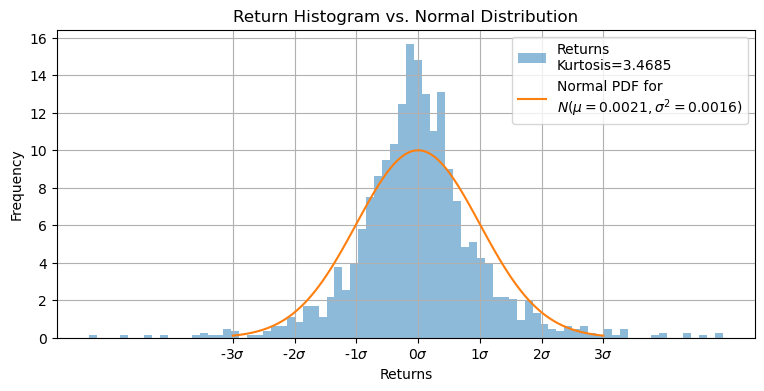

In [8]:
# Compare to normal distribution
mu = df['Return'].mean()
sigma = df['Return'].std()
kurtosis = stats.kurtosis(df['Return'].dropna())
plt.figure(figsize=(9, 4))
plt.hist(df['Return'], density=True, bins=80, label=f"Returns\nKurtosis={kurtosis:.4f}", alpha=0.5)

# following 68–95–99.7 rule, 3 stdevs from mean contain 99.7% of normally distributed values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm(mu, sigma).pdf(x), label=f"Normal PDF for\n$N(\mu=${mu:.4f}$, \sigma^2=${sigma**2:.4f})")

plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("Return Histogram vs. Normal Distribution")
plt.legend()

xticks = np.linspace(mu - 3*sigma, mu + 3*sigma, 7)
plt.xticks(xticks, labels=[f"{i}$\sigma$" for i in range(-3, 4)])
plt.grid()
plt.show()

Our plot shows a pattern often observed for financial returns (also explained in e.g. [7]): The returns of our considered asset are not normally distributed with kurtosis $>3$, implying higher peaks and fatter tails than normal distribution.

In [9]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1611.0,1.485433e+02,1.105639e+02,1.207333e+01,2.263067e+01,1.725500e+02,2.386633e+02,4.114700e+02
High,1611.0,1.518373e+02,1.129517e+02,1.244533e+01,2.313233e+01,1.754000e+02,2.437283e+02,4.144967e+02
Low,1611.0,1.449931e+02,1.078843e+02,1.179933e+01,2.222700e+01,1.677900e+02,2.339850e+02,4.056667e+02
Close,1611.0,1.484902e+02,1.104293e+02,1.193133e+01,2.258067e+01,1.720800e+02,2.386550e+02,4.099700e+02
Adj Close,1611.0,1.484902e+02,1.104293e+02,1.193133e+01,2.258067e+01,1.720800e+02,2.386550e+02,4.099700e+02
Volume,1611.0,1.311374e+08,8.164712e+07,2.940180e+07,8.134200e+07,1.073432e+08,1.506976e+08,9.140820e+08
Return,1610.0,2.100678e-03,3.988463e-02,-2.106282e-01,-1.917152e-02,1.535058e-03,2.063046e-02,1.989486e-01


Check if original data needs cleaning + clean appropriately

In [10]:
 # Check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       1
dtype: int64

Clean the data + remove NaN value from "Return" column:

In [11]:
df = df.dropna()  # drop NaN values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

### ---------- Feature Engineering ----------

Features are independent variables which are used to determine the value of the target variable. We will generate a set of features from the downloaded dataset according to the definition from the exam paper.

In [12]:
def get_features(df):
    df['O-C'] = df['Open'] - df['Close']
    df['H-L'] = df['High'] - df['Low']
    df['Sign'] = np.sign(np.log(df['Close'] / df['Close'].shift(1)))

    for lag in [1, 3, 5, 10, 21]:
        df[f'Past Return_{lag}'] = df['Return'].shift(lag)

    for momentum_period in [1, 3, 5, 10, 21]:
        df[f'Momentum_{momentum_period}'] = df['Close'] - df['Close'].shift(momentum_period)

    for sma_period in [1, 3, 5, 10, 21]:
        df[f'SMA_{sma_period}'] = df['Close'].rolling(window=sma_period).mean()

    for ema_period in [1, 3, 5, 10, 21]:
        df[f'EMA_{ema_period}'] = df['Close'].ewm(span=ema_period, adjust=False).mean()

    df.dropna(inplace=True)
    features = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
    return features


features = get_features(df)
features.head()

,Adj Close,Return,O-C,H-L,Sign,Past Return_1,Past Return_3,Past Return_5,Past Return_10,Past Return_21,...,SMA_1,SMA_3,SMA_5,SMA_10,SMA_21,EMA_1,EMA_3,EMA_5,EMA_10,EMA_21
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-02,22.916668,-0.015748,0.312666,0.762667,-1.0,-0.014281,-0.010614,0.015431,0.015817,-0.010233,...,22.916668,23.273556,23.235467,23.155933,22.747524,22.916668,23.115321,23.142489,23.071941,22.733514
2018-02-05,22.208668,-0.030895,0.322666,0.764666,-1.0,-0.015748,0.024550,0.019484,0.004400,-0.008290,...,22.208668,22.802890,23.016800,23.033067,22.806286,22.208668,22.661994,22.831215,22.914982,22.685801
2018-02-06,22.264668,0.002522,-0.584000,0.848000,1.0,-0.030895,-0.014281,-0.010614,0.003499,0.006230,...,22.264668,22.463334,22.858801,22.907600,22.861492,22.264668,22.463331,22.642366,22.796743,22.647516
2018-02-07,23.000000,0.033027,-0.400667,0.689335,1.0,0.002522,-0.015748,0.024550,-0.019558,0.062638,...,23.000000,22.491112,22.734667,22.901667,22.888762,23.000000,22.731665,22.761577,22.833699,22.679560
2018-02-08,21.015333,-0.086290,1.872000,2.268000,-1.0,0.033027,-0.030895,-0.014281,-0.023852,-0.008085,...,21.015333,22.093334,22.281067,22.752267,22.830159,21.015333,21.873499,22.179496,22.503087,22.528267


### ---------- Label Specification ----------

For general trend analysis, we would like to include slight drops of up to 0.25% in the closing price of TSLA still part of the positive class (1), so we design our target variable as follows:

In [13]:
def get_target(df):
    # for trend prediction, contain days with small decrease (< 0.25%) in asset close price also within positive class
    return np.where(df['Close'].shift(-1) > 0.9975 * df['Close'], 1, 0)

In [14]:
X = features
y = get_target(df)

# Check Class Imbalance
pd.Series(y).value_counts()

1    882
0    707
Name: count, dtype: int64

We observe that the number of days where the TSLA closed positively w.r.t. our definition (i.e. at least at 99.75% of the previous day's closing price; class variable 1) are higher than the number of days where the index closed negatively (class variable 0).

Also note that this target specification makes our problem a typical **classification** problem.

### ---------- Split Data: Testing vs. Training Data ----------

Before we dive deeper into feature selection, we want to split our data into testing and training data.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### ---------- Feature Selection ----------

This follows mostly [6], Exercise 1 that discussed various feature selection methods. We currently have quite many suggested features which might make the model less accuracte and more performant.

Current number of features:

In [16]:
len(features.columns)

25

Let us first look at the so-called `SelectKBest` method, a frequently applied feature selection algorithm that selects the top $k$ features with the highest scores based on statistical testing. In our case, we use the `f_classif` test based on the ANOVA F-value test and select the $k=16$ best features (`f_classif` is the default implementation of `SelectKBest` according to [8]).

Since we start with 25 features and I do not want to limit the model too quickly (we will later combine other selection methods to narrow the feature number down), let us look at the 16 best features (opposed to the default implementation of `SelectKBest` narrowing down to the 10 best features).

In [17]:
def select_k_best(X_train, X_test, y_train, k=10):
    selector = SelectKBest(f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    selected_features = X_train.columns[selector.get_support()]
    return selected_features, X_train_selected, X_test_selected


selected_features_kbest, X_train_kbest, X_test_kbest = select_k_best(X_train, X_test, y_train, k=16)

print("SelectKBest selected features:\n", selected_features_kbest)

SelectKBest selected features:
 Index(['Return', 'O-C', 'H-L', 'Past Return_1', 'Past Return_3',
       'Past Return_5', 'Past Return_21', 'Momentum_1', 'Momentum_5',
       'Momentum_10', 'Momentum_21', 'SMA_1', 'SMA_10', 'SMA_21', 'EMA_1',
       'EMA_21'],
      dtype='object')


Next, we attempt to further refine our feature selection by employing a recursive feature elimination with cross-validation `RFECV`. Recursive feature elimination means that this selector iteratively removes the least important feature according to an importance ranking. Moreover, cross-validation is applied to ensure the selected features behave well with respect to test data. This can help with overfitting.

Unlike the exercise sheets [6], we will use `RandomForestClassifier()` instead of `LinearRegression()` for our model within the RFECV framework since our analysis revolves around a binary classification problem. (Remark: I tried using different classifiers including `LogisticClassifier()` and `RandomForestClassifier()` with various hyper-parameters and my solution below yielded the best overall results.) `RandomForestClassifier()` [9] employs random forests fitting a number of decision trees on different subsets of the training data. It is an ensemble method. The interplay of ensemble learning and decision trees can improve the accuracy of the model and reduce its variance.

In [18]:
def rfecv_method(X_train, X_test, y_train, step=0.1, n_estimators=100, display_dataframe=0):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfecv = RFECV(estimator=model, step=step, cv=5, scoring="accuracy")
    rfecv.fit(X_train, y_train)
    X_train_selected = rfecv.transform(X_train)
    X_test_selected = rfecv.transform(X_test)
    selected_features = X_train.columns[rfecv.get_support()]
    if display_dataframe:
        rankings_df = pd.DataFrame({'Feature': X_train.columns,
                                    'Ranking': rfecv.ranking_})
        print(rankings_df.sort_values(by="Ranking"))
    return X_train_selected, X_test_selected, selected_features


X_train_rfecv, X_test_rfecv, selected_features_rfecv = rfecv_method(
    pd.DataFrame(X_train_kbest, columns=selected_features_kbest),
    pd.DataFrame(X_test_kbest, columns=selected_features_kbest), y_train, display_dataframe=1)

print("")
print("RFECV selected features:", selected_features_rfecv)

           Feature  Ranking
1              O-C        1
2              H-L        1
3    Past Return_1        1
4    Past Return_3        1
5    Past Return_5        1
6   Past Return_21        1
7       Momentum_1        1
8       Momentum_5        1
9      Momentum_10        1
10     Momentum_21        1
14           EMA_1        1
0           Return        2
13          SMA_21        3
12          SMA_10        4
11           SMA_1        5
15          EMA_21        6

RFECV selected features: Index(['O-C', 'H-L', 'Past Return_1', 'Past Return_3', 'Past Return_5',
       'Past Return_21', 'Momentum_1', 'Momentum_5', 'Momentum_10',
       'Momentum_21', 'EMA_1'],
      dtype='object')


The ranking table above shows which features where removed first (at the bottom of the dataframe). The ones with ranking 1 on top are being kept.

Let us now analyze multicollinearity would lead to redundancy in our trend analysis among the remaining features. A way to check for correlation between features is to use the correlation matrix computing the Pearson correlation $$\rho_{ij} = \frac{\text{cov}(X_i, X_j)}{\sigma_{X_i} \sigma_{X_j}}$$ pairwisely between feature $X_i$ and feature $X_j$. High correlation or high anti-correlation are indicators to discard one of both correlated features.

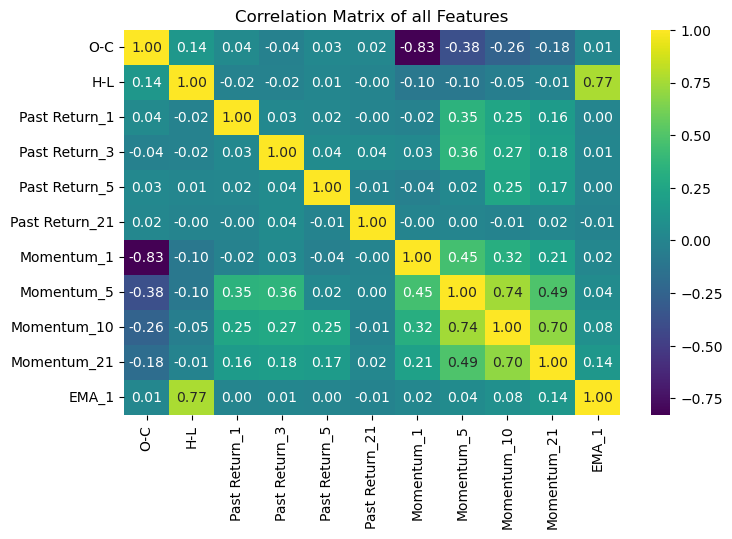

In [60]:
corr_matrix = pd.DataFrame(X_train_rfecv, columns=selected_features_rfecv).corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap="viridis")
plt.title("Correlation Matrix of all Features")
plt.show()

This table shows 2 highly correlated feature pairs:
* $Corr(\text{O-C}, \text{Momentum_1} = -83\%$
* $Corr(\text{H_L}, \text{EMA_1} = 77\%$

This is an indicator that we can drop one feature of each correlated feature pair to reduce linear dependency among features. We will now determine which one to drop by regarding their pairwise correlations with other features. Although this simple sum technique does not account for second-order effects, it can give some indication.

In [61]:
print("O-C: ", round(sum(abs(corr_matrix['O-C'])), 4))
print("Momentum_1: ", round(sum(abs(corr_matrix['Momentum_1'])), 4))

O-C:  2.9277
Momentum_1:  3.0252


In [62]:
print("H-L: ", round(sum(abs(corr_matrix['H-L'])), 4))
print("EMA_1: ", round(sum(abs(corr_matrix['EMA_1'])), 4))

H-L:  2.2253
EMA_1:  2.0847


We choose to drop Momentum_1 and H_L from our feature table since they had higher pairwise correlations with the other features.

In [66]:
X_train_corr = pd.DataFrame(X_train_rfecv, columns=selected_features_rfecv).drop(columns=["Momentum_1", "H-L"])
X_test_corr = pd.DataFrame(X_test_rfecv, columns=selected_features_rfecv).drop(columns=["Momentum_1", "H-L"])

To further improve the significance of the chosen features, we will conduct a Variance Inflation Factor (VIF) analysis for each feature, calculating its $$\text{VIF}_i =\frac{1}{1-R_i^2},$$ where $R_i^2$ determines how well feature $i$ is being regressed against by all other features. The feature is more correlated with the other features, the higher the value of $R_i^2$ is. According to [6], a VIF-value exceeding 5 indicates high multicollinearity.

In [127]:
def variance_inflation_factor_analysis(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data


vif_data = variance_inflation_factor_analysis(pd.DataFrame(X_train_corr,
                                                           columns=selected_features_corr))
vif_data.round(2).sort_values(by="VIF", ascending=False)

,feature,VIF
6,Momentum_10,3.70
5,Momentum_5,3.14
7,Momentum_21,1.98
0,O-C,1.25
1,Past Return_1,1.21
2,Past Return_3,1.19
3,Past Return_5,1.15
8,EMA_1,1.03
4,Past Return_21,1.01


The features are not majorly correlated anymore and seem an appropriate selection to continue.

In [73]:
X_train_selected = pd.DataFrame(X_train_corr, columns=selected_features_corr)
X_test_selected = pd.DataFrame(X_test_corr, columns=selected_features_corr)
selected_features = selected_features_corr

### ---------- Base Model ----------

We will use Pipelines and some default parameters to build a base model now using SVC method, explained in Paul's introductory lectures [10]. For Python help, I also consulted the official `scikit-learn` documentation [11].

In [140]:
# Define a baseline model to benchmark against
base_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel="rbf", C=1.0, gamma=0.1, random_state=42))
])
base_model.fit(X_train_selected, y_train)

print(base_model.classes_)  # verify class labels

[0 1]


In [141]:
# Predict on the test data
y_pred = base_model.predict(X_test_selected)
y_pred[-20:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [142]:
# Evaluate the model for both test + training data
accuracy_train = accuracy_score(y_train, base_model.predict(X_train_selected))
accuarcy_test = accuracy_score(y_test, y_pred)
print(f"Baseline Model:\nTrain Accuracy: {accuracy_train:0.4}, Test Accuracy: {accuarcy_test:0.4}")

Baseline Model:
Train Accuracy: 0.6145, Test Accuracy: 0.5503


The accuracy score of our baseline model is sufficient for a start, but we probably have overfit our model since the test accuracy is significantly lower than the train accuracy. We will try to play around with the hyper-parameters in the following to improve the model accuracy.

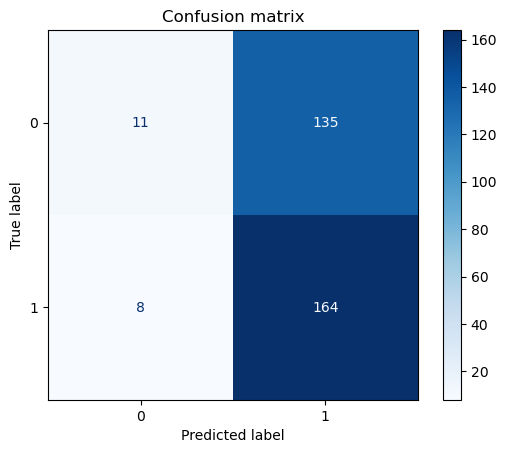

In [143]:
# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(base_model, X_test_selected, y_test, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()

The confusion matrix implies that our baseline model is better than chance (a 50:50 random guessing approach), but still has quite many false negatives (predicting 1 when actual label of 0 is actually known). This can also be seen from the ROC curve below:

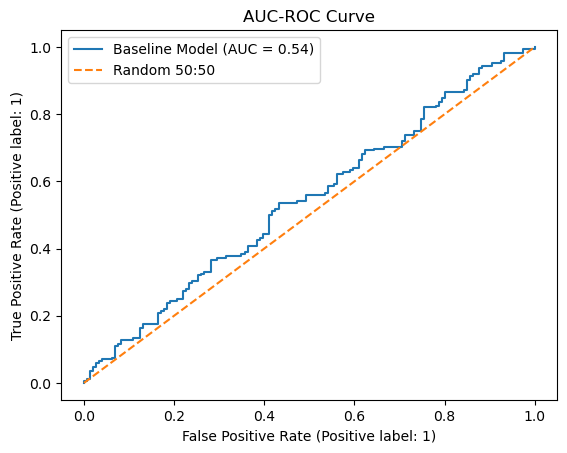

In [144]:
# Display ROC Curve
RocCurveDisplay.from_estimator(base_model, X_test_selected, y_test, name="Baseline Model")
plt.title("AUC-ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random 50:50")
plt.legend()
plt.show()

### ---------- Hyperparameter Tuning ----------

Our initial model was not very accurate overall. We will try to tune our hyper-parameters, especially the values for  to improve our model. The following part follows again [2] and utilizes `optuna` library for hyper-parameter optimization.

We first take a look at all the model's parameters:

In [145]:
base_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', SVC(gamma=0.1, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': SVC(gamma=0.1, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 1.0,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 3,
 'classifier__gamma': 0.1,
 'classifier__kernel': 'rbf',
 'classifier__max_iter': -1,
 'classifier__probability': False,
 'classifier__random_state': 42,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

We apply a `optuna` study to tune our hyper-parameters and find the best hyper-parameter combination according to a log-loss function. The objective function also performs cross-validation using `TimeSeriesSplit` on the time series data.
The hyper-parameters tested are as follows:
* scaler: Feature scaling is tested between `StandardScaler` and `MinMaxScaler`
* C: Regularization parameter of SVM. Tweaking it can help with the trade-off between variance and bias, i.e. balance between under- and overfitting.
* gamma: Kernel coefficient to define how influential a single training example is.
* kernel: Kernel function for SVM. Choice between `rbf` (Radial Basis Function), `linear`, `sigmoid`.

In [150]:
def objective(trial, X, y):
    # define hyper-parameter space
    scaler_name = trial.suggest_categorical("scaler", ["standard", "minmax"])
    C = trial.suggest_loguniform("C", 0.0001, 100.0)
    gamma = trial.suggest_loguniform("gamma", 0.0001, 1.0)
    kernel = trial.suggest_categorical("kernel", ["rbf", "linear", "sigmoid"])

    # create pipeline
    model = Pipeline([
        ("scaler", StandardScaler() if scaler_name == "standard" else MinMaxScaler()),
        ("svm", SVC(C=C, gamma=gamma, kernel=kernel, probability=True, random_state=42))
    ])

    # define TimeSeriesSplit for CrossValidation
    tscv = TimeSeriesSplit(n_splits=5)

    # use log-loss function for every TimeSeriesSplit to measure performance of hyper-params
    log_losses = []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        preds = model.predict_proba(X_test)
        log_losses.append(log_loss(y_test, preds))
    return -1.0 * np.mean(log_losses)


def optimize_hyperparameters(X_train, y_train, n_trials=100):
    # convert pandas objects to numpy arrays
    X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
    y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

    # study setup
    study = optuna.create_study(study_name="hp-tuning", direction="maximize")

    # optimization
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=n_trials)
    best_params = study.best_trial.params

    # create best pipeline
    scaler = StandardScaler() if best_params['scaler'] == 'standard' else MinMaxScaler()
    best_model = Pipeline([
        ("scaler", scaler),
        ("svm", SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], probability=True))
    ])
    return best_model, best_params, study

In [151]:
best_model, best_params, study = optimize_hyperparameters(X_train_selected, y_train, n_trials=100)

[I 2024-05-28 23:55:56,422] A new study created in memory with name: hp-tuning
[I 2024-05-28 23:55:57,447] Trial 0 finished with value: -0.695368044015617 and parameters: {'scaler': 'minmax', 'C': 0.0027295433332482806, 'gamma': 0.0002641589292518846, 'kernel': 'rbf'}. Best is trial 0 with value: -0.695368044015617.
[I 2024-05-28 23:55:58,419] Trial 1 finished with value: -0.6860485834690706 and parameters: {'scaler': 'minmax', 'C': 0.01893307246681074, 'gamma': 0.29414333267374154, 'kernel': 'rbf'}. Best is trial 1 with value: -0.6860485834690706.
[I 2024-05-28 23:55:59,459] Trial 2 finished with value: -0.6866976782800528 and parameters: {'scaler': 'standard', 'C': 73.81334310547342, 'gamma': 0.0008951314966442853, 'kernel': 'rbf'}. Best is trial 1 with value: -0.6860485834690706.
[I 2024-05-28 23:56:00,089] Trial 3 finished with value: -0.6883349758994874 and parameters: {'scaler': 'standard', 'C': 0.6709858087095617, 'gamma': 0.23446039901840088, 'kernel': 'sigmoid'}. Best is trial

[I 2024-05-28 23:56:24,065] Trial 34 finished with value: -0.6919963410435545 and parameters: {'scaler': 'standard', 'C': 5.112406045089976, 'gamma': 0.41360987467515, 'kernel': 'rbf'}. Best is trial 17 with value: -0.6844755102612723.
[I 2024-05-28 23:56:24,812] Trial 35 finished with value: -0.6932630447501781 and parameters: {'scaler': 'standard', 'C': 1.1955301310052628, 'gamma': 0.6920223064535043, 'kernel': 'rbf'}. Best is trial 17 with value: -0.6844755102612723.
[I 2024-05-28 23:56:26,047] Trial 36 finished with value: -0.6890095109608012 and parameters: {'scaler': 'standard', 'C': 42.07195518266129, 'gamma': 0.1867858377125654, 'kernel': 'rbf'}. Best is trial 17 with value: -0.6844755102612723.
[I 2024-05-28 23:56:26,587] Trial 37 finished with value: -0.6875738540642818 and parameters: {'scaler': 'minmax', 'C': 3.5976818450637142, 'gamma': 0.022924624133689106, 'kernel': 'sigmoid'}. Best is trial 17 with value: -0.6844755102612723.
[I 2024-05-28 23:56:27,334] Trial 38 finishe

[I 2024-05-28 23:57:00,546] Trial 69 finished with value: -0.6880032307605087 and parameters: {'scaler': 'standard', 'C': 6.493020470296908, 'gamma': 0.2152933847332445, 'kernel': 'rbf'}. Best is trial 17 with value: -0.6844755102612723.
[I 2024-05-28 23:57:01,535] Trial 70 finished with value: -0.6860397048088254 and parameters: {'scaler': 'standard', 'C': 0.7011249687998017, 'gamma': 0.015099867789782515, 'kernel': 'rbf'}. Best is trial 17 with value: -0.6844755102612723.
[I 2024-05-28 23:57:02,948] Trial 71 finished with value: -0.6849467875683493 and parameters: {'scaler': 'standard', 'C': 33.988272800806776, 'gamma': 0.09096790568898509, 'kernel': 'rbf'}. Best is trial 17 with value: -0.6844755102612723.
[I 2024-05-28 23:57:03,934] Trial 72 finished with value: -0.6848055924413595 and parameters: {'scaler': 'standard', 'C': 20.10184800469384, 'gamma': 0.10034589801391537, 'kernel': 'rbf'}. Best is trial 17 with value: -0.6844755102612723.
[I 2024-05-28 23:57:04,900] Trial 73 finis

In [165]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=27.416464672140485, gamma=0.05903956612148762,
                     probability=True))])

In [166]:
best_params

{'scaler': 'standard',
 'C': 27.416464672140485,
 'gamma': 0.05903956612148762,
 'kernel': 'rbf'}

### ---------- Visualize Optimization Process ----------

In [167]:
# optimization history plot
optuna.visualization.plot_optimization_history(study)

In [157]:
# plot param importances
optuna.visualization.plot_param_importances(study)

In [158]:
# plot negative log-loss for each hyper-parameter trial (100 dots)
optuna.visualization.plot_slice(study)

In [159]:
optuna.visualization.plot_contour(study)

### ---------- The Best Model Post-Tuning ----------

Let us now compare our tuned model with our base model.

In [168]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=27.416464672140485, gamma=0.05903956612148762,
                     probability=True))])

In [169]:
base_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(gamma=0.1, random_state=42))])

In [170]:
best_model.fit(X_train_selected, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=27.416464672140485, gamma=0.05903956612148762,
                     probability=True))])

In [171]:
def analyze_model(model, X_train, X_test, y_train, y_test, generate_plots=0):
    # predict y on the test data
    y_pred = model.predict(X_test)

    # evaluate model accuracy
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    accuarcy_test = accuracy_score(y_test, y_pred)
    print(f"Train Accuracy: {accuracy_train:0.4}, Test Accuracy: {accuarcy_test:0.4}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    if generate_plots:
        print("Confusion Matrix:")
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
        plt.title("Confusion matrix")
        plt.show()

        # Display ROC Curve
        RocCurveDisplay.from_estimator(model, X_test, y_test, name="Baseline Model")
        plt.title("AUC-ROC Curve")
        plt.plot([0, 1], [0, 1], linestyle="--", label="Random 50:50")
        plt.legend()
        plt.show()

Train Accuracy: 0.6145, Test Accuracy: 0.5503
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.08      0.13       146
           1       0.55      0.95      0.70       172

    accuracy                           0.55       318
   macro avg       0.56      0.51      0.41       318
weighted avg       0.56      0.55      0.44       318

Confusion Matrix:


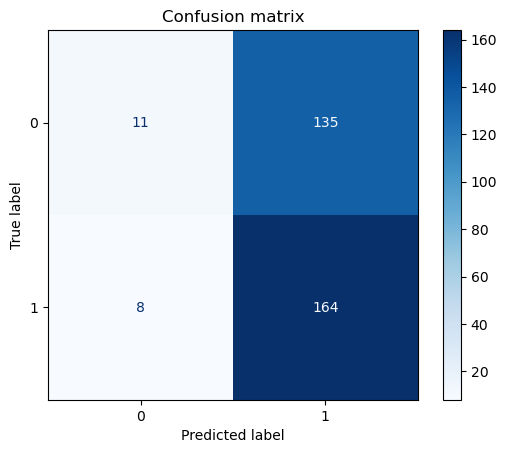

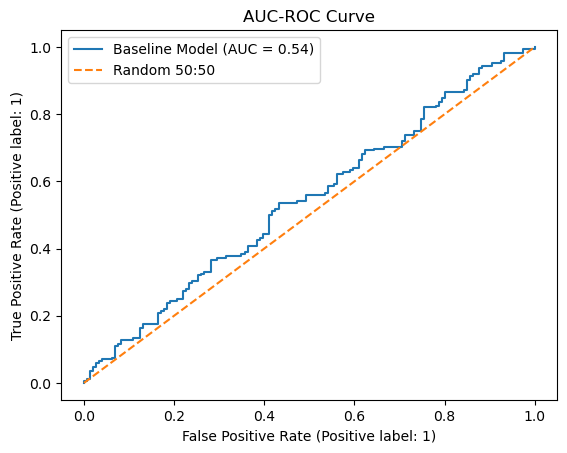

In [172]:
analyze_model(base_model, X_train_selected, X_test_selected, y_train, y_test, generate_plots=1)

Train Accuracy: 0.7065, Test Accuracy: 0.5472
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.25      0.33       146
           1       0.56      0.80      0.66       172

    accuracy                           0.55       318
   macro avg       0.54      0.52      0.50       318
weighted avg       0.54      0.55      0.51       318

Confusion Matrix:


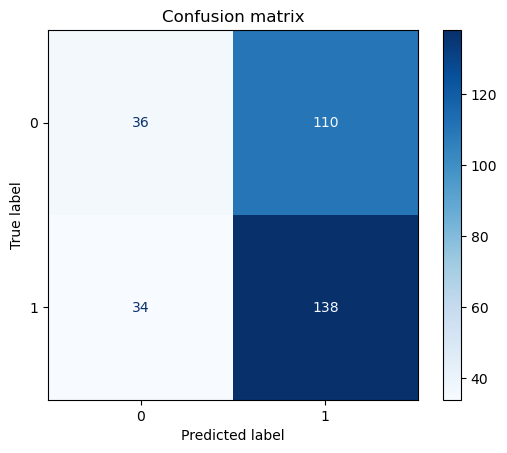

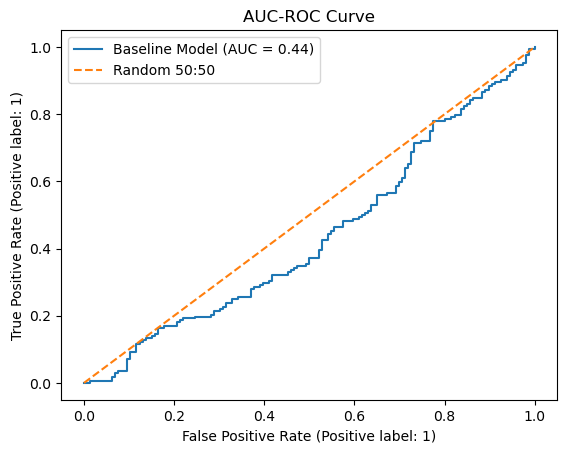

In [173]:
analyze_model(best_model, X_train_selected, X_test_selected, y_train, y_test, generate_plots=1)

#### Conclusion
The results from the classification reports, confusion matrices and ROC curves indicate that while tuning the hyper-parameters of the SVM model has improved the training accuracy, the test accuracy and other performance metrics on the test set have not shown significant improvement and have, in some cases, even deteriorated slightly. In particular, the tuned model appears to be overfitting to the training data, as the accuracy gains do not translate well to the test set, indicating poor generalization to unseen data.

The confusion matrix shows that both base and tuned model struggle with class imbalance. This is also visible from the classification report by exploring the imbalanced recall scores, implying that both models are biased towards class 1 (positive trend), while struggling to correctly identify class 0 (negative trend).

## References

* [1]: JA244.5: Lecture Notes on *Supervised Learning II" by Kannan Singaravelu, CQF Faculty
* [2]: JA24P10: CQF Python Labs on *Trend prediction using Logistic Regression* by Kannan Singaravelu
* [3]: JA244.6: Lecture Notes on *Decision Trees & Ensemble Models* by Dr. Panos Parpas, CQF Associate Faculty
* [4]: JA24P11: CQF Python Labs on *Gradient Boosting for Price Prediction* by Kannan Singaravelu
* [5]: JA244.4: Lecture Notes on *Supervised Learning I* by Kannan Singaravelu, CQF Faculty
* [6]: JA244.4: Solutions on *Supervised Learning I* by Kannan Singaravelu, CQF Faculty
* [7]: JA242.4: Lecture Notes on *Asset Returns: Key Imperial Stylized Facts* by Prof. Stephen Taylor, CQF Associate Faculty
* [8]: [`sklearn.feature_selection.SelectKBest` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html): retrieved on 2024-05-24
* [9]: [`sklearn.ensemble.RandomForestClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): retrieved on 2024-05-25
* [10]: JA244.1 & 2: Lecture Notes on *An Introduction to Machine Learning I & II*, "Intro to ML - 7 - SVM" by Dr. Paul Wilmott, CQF Associate Faculty, CQF Founder
* [11]: [`sklearn` User Guide for Supervised learning](https://scikit-learn.org/stable/modules/svm.html): retrieved on 2024-05-28